# Vector calculus (MM1)
[<!-- module-mm1 badge --><span class="module module-mm1">Mathematics Methods 1</span>](module-mm1) 
```{index} Vector calculus
```

In [1]:
## This cell just imports necessary modules
from sympy import sin, cos, exp, Function, Symbol, diff, integrate, solve, pi
from mpl_toolkits import mplot3d
import numpy
import matplotlib.pyplot as plt

## Scalar fields

**Slide 3**

In [2]:
# Create a mesh of 2D Cartesian coordinates, where -5 <= x <= 5 and -5 <= y <= 5
x = numpy.arange(-5., 5., 0.25)
y = numpy.arange(-5., 5., 0.25)
X, Y = numpy.meshgrid(x, y)

# Computes the value of the scalar field at each (x,y) coordinate, and stores it in Z.
f = 16 - 2*X**2 - Y**2 + X*Y

Contour plot of the scalar field $f(x,y)=16-2x^2-y^2+xy$

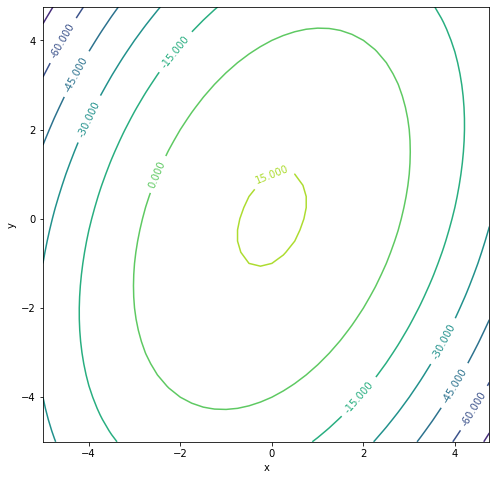

In [3]:
fig = plt.figure(figsize=(8, 8))
contour_plot = plt.contour(X, Y, f)
plt.clabel(contour_plot, inline=True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Surface plot of the scalar field $f(x,y)=16-2x^2-y^2+xy$

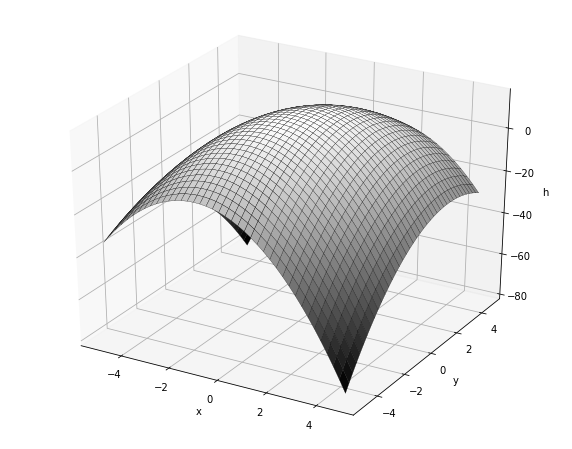

In [4]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, f, cmap='gray', edgecolor = 'k', lw=0.25)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("h")
plt.show()

Surface and contour plot of the scalar field $f(x,y)=16-2x^{2}-y^{2}+xy$

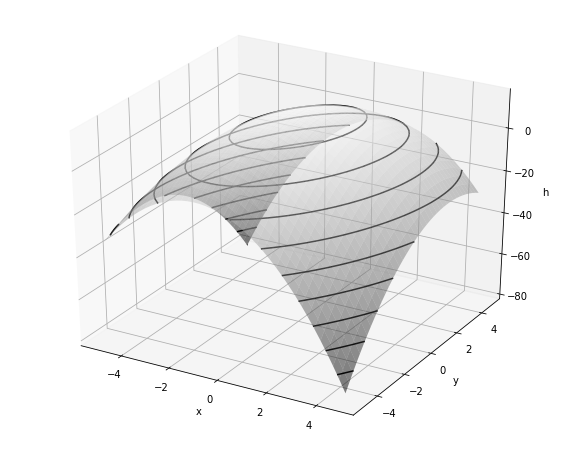

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, f, cmap='gray', alpha=0.5)
ax.contour3D(X, Y, f, 10, colors='k', linestyles='-')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("h")
plt.show()

## Vector fields

**Slide 4**

Define and plot the vector field \\(u=(-x^2, \ -y^2)\\) on a quiver plot

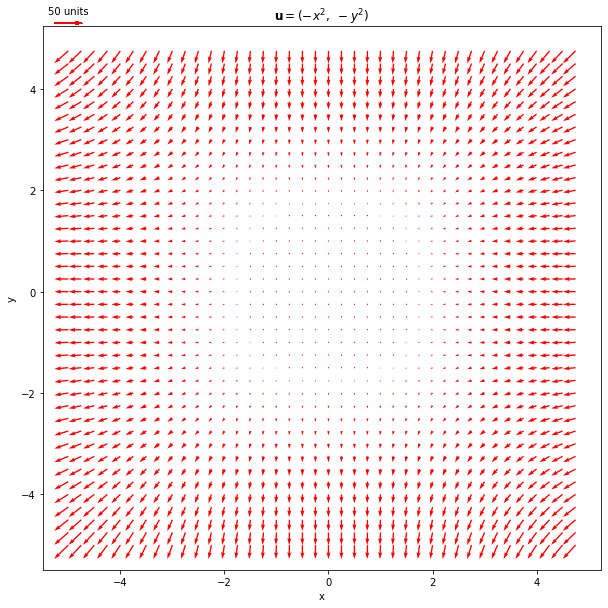

In [6]:
# Create a mesh of 2D Cartesian coordinates, where -5 <= x <= 5 and -5 <= y <= 5
x = numpy.arange(-5.0, 5.0, 0.25)
y = numpy.arange(-5.0, 5.0, 0.25)
X, Y = numpy.meshgrid(x, y)

# Computes the value of the vector field at each (x,y) coordinate.
# Z1 and Z2 hold the i and j component of the vector field respectively.
Z1 = -(X**2)
Z2 = -(Y**2)

fig = plt.figure(figsize=(10, 10))
quiver_plot = plt.quiver(X, Y, Z1, Z2, angles='xy', scale=1000, color='r')
plt.quiverkey(quiver_plot, -5, 5.3, 50, "50 units", coordinates='data', color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title(r'$\mathbf{u}=(-x^2, \ -y^2)$')
plt.show()

## Gradients

**Slide 6**

Computing the gradient on scalar field using `sympy.diff`, and finding where `gradient=0` using `sympy.solve`:

In [7]:
# Define the independent variables using Symbol
x = Symbol('x')
y = Symbol('y')
# Define the function f(x,y)
f = 16 - 2*(x**2) - y**2 + x*y

# The gradient of f (a scalar field) is a vector field:
grad_f = [diff(f,x), diff(f,y)]
print("The gradient of the scalar field f(x,y) = 16 - 2*(x**2) - y**2 + x*y is:", grad_f)

print("The point where the gradient is zero is:",
      solve([grad_f[0], grad_f[1]], [x, y]))

The gradient of the scalar field f(x,y) = 16 - 2*(x**2) - y**2 + x*y is: [-4*x + y, x - 2*y]
The point where the gradient is zero is: {y: 0, x: 0}


Let us now plot $v=(-4x+y, \ x-2y)$

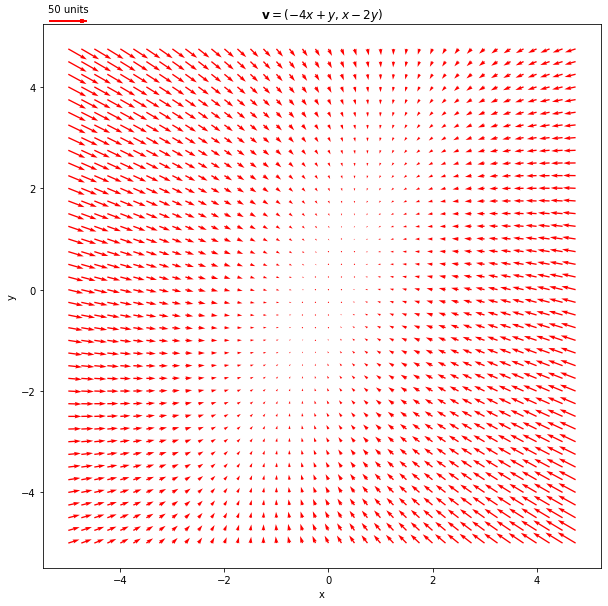

In [8]:
x = numpy.arange(-5., 5., 0.25)
y = numpy.arange(-5., 5., 0.25)
X, Y = numpy.meshgrid(x, y)

Z1 = -4*X + Y
Z2 = X - 2*Y

fig = plt.figure(figsize=(10, 10))
quiver_plot = plt.quiver(X, Y, Z1, Z2, angles='xy', scale=750, color='r')
plt.quiverkey(quiver_plot, -5, 5.3, 50, "50 units", coordinates='data', color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title(r'$\mathbf{v} = (-4x + y, x - 2y)$')
plt.show()

## Directional derivatives

**Slide 12**

Here we will compute the gradient of a scalar field using `sympy.diff`, the gradient at a specific point using `evalf` method, and the gradient at a specific point towards the direction of a unit vector using `numpy.dot`.

Let us consider a scalar field \\(h(x,y)=3xy^2\\).

In [9]:
# Define the independent variables using Symbol
x = Symbol('x')
y = Symbol('y')
# Define the function h(x,y)
h = 3*x*(y**2)

# The gradient of h
grad_h = [diff(h,x), diff(h,y)]
print("The gradient of h(x,y) = 3*x*(y**2) is: ")
print(grad_h, "\n")

# Use evalf to evaluate a function, with subs to substitute in specific values for x and y
grad_h_at_point = [grad_h[0].evalf(subs={x:1, y:2}), grad_h[1].evalf(subs={x:1, y:2})]
print("At the point (1,2), the gradient is:", grad_h_at_point, "\n")

# Find the unit vector in the direction 3i + 4j
a = numpy.array([3, 4])
a_magnitude = numpy.linalg.norm(a, ord=2)
unit_a = a/a_magnitude

print("The unit vector in the direction 3i + 4j is:")
print(unit_a, "\n")

# Dot product to get the directional derivative 
# (i.e. the gradient of h in the direction of the vector unit_a)
slope = numpy.dot(grad_h_at_point, unit_a)
print("The slope of h in the direction", unit_a, "at (1,2) is:", slope)

The gradient of h(x,y) = 3*x*(y**2) is: 
[3*y**2, 6*x*y] 

At the point (1,2), the gradient is: [12.0000000000000, 12.0000000000000] 

The unit vector in the direction 3i + 4j is:
[0.6 0.8] 

The slope of h in the direction [0.6 0.8] at (1,2) is: 16.8000000000000


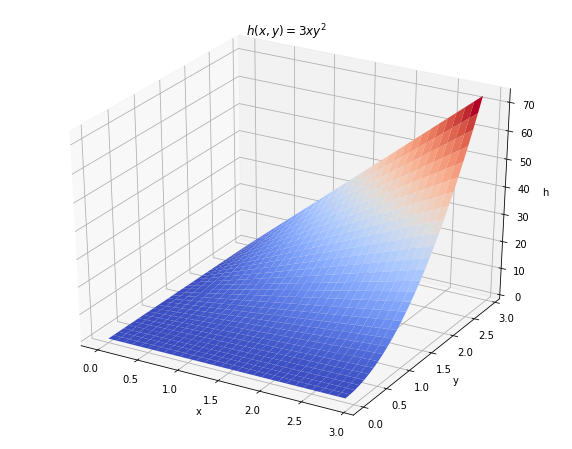

In [10]:
x = numpy.arange(0., 3., 0.1)
y = numpy.arange(0., 3., 0.1)
X, Y = numpy.meshgrid(x, y)
h = 3 * X * Y**2

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, h, cmap='coolwarm', lw=0.25)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("h")
ax.set_title(r'$h(x,y)=3xy^2$')
plt.show()

## Divergence

**Slide 15**

We will compute the divergence of a vector field using `sympy.diff`.

In [11]:
# Define the independent variables using Symbol
x = Symbol('x')
y = Symbol('y')
# Define the vector field v(x,y)
v = [-(x**2), -(y**2)]

# Compute the divergence using diff. 
divergence = diff(v[0],x) + diff(v[1],y)
print("The divergence of the vector field", v, "is:", divergence)

The divergence of the vector field [-x**2, -y**2] is: -2*x - 2*y


```{note}
NOTE 1: A neater way would be to use SymPy's dot function. However, there doesn't seem to be a way of defining a gradient vector in SymPy without specifying the function we wish to operate on, so we'll compute the divergence the long way.

NOTE 2: this is the dot product of the gradient vector and v, which will always result in a scalar. d/dx is applied to the first component of v (i.e. v[0]), d/dy is applied to the second component of v (i.e. v[1])
```

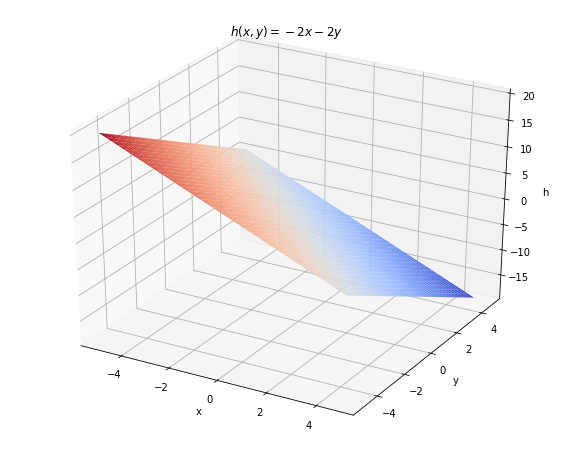

In [12]:
# Create a mesh of 2D Cartesian coordinates, where -5 <= x <= 5 and -5 <= y <= 5
x = numpy.arange(-5., 5., 0.25)
y = numpy.arange(-5., 5., 0.25)
X, Y = numpy.meshgrid(x, y)

h = -2 * X - 2 * Y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, h, cmap='coolwarm', edgecolor = 'none', lw=0.25)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("h")
ax.set_title(r'$h(x,y)=-2x-2y$')
plt.show()

## Curl

**Slide 19**

Compute the curl of a vector field using `sympy.diff`, and the curl at a specific point using `evalf`. Remember: the curl of a vector always results in another vector.

In [13]:
# Define the independent variables using Symbol
x = Symbol('x')
y = Symbol('y')
# Define the vector field v(x,y)
v = [cos(pi*y), -cos(pi*x)]

# Compute the curl using diff.
# The first two components of the curl are zero because v has a zero k-component.
curl = [0, 0, diff(v[1], x) - diff(v[0], y)]
print("The curl of the vector field", v, "is:", curl)
print("At the point (0, -0.5), the curl is:",
      [0, 0, curl[2].evalf(subs={x:0, y:-0.5})])

The curl of the vector field [cos(pi*y), -cos(pi*x)] is: [0, 0, pi*sin(pi*x) + pi*sin(pi*y)]
At the point (0, -0.5), the curl is: [0, 0, -3.14159265358979]


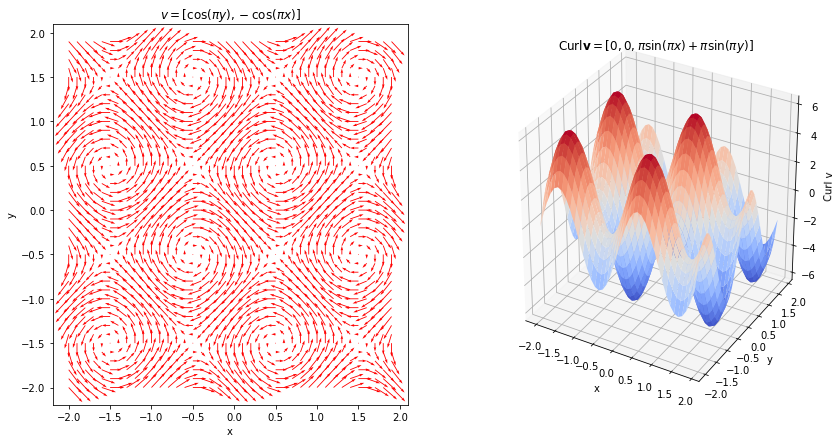

In [14]:
x = numpy.arange(-2., 2., 0.1)
y = numpy.arange(-2., 2., 0.1)
X, Y = numpy.meshgrid(x, y)

# Computes the value of the vector field at each (x,y) coordinate.
# Z1 and Z2 hold the i and j component of the vector field respectively.
Z1 = numpy.cos(numpy.pi*Y)
Z2 = -numpy.cos(numpy.pi*X)

# Curl v
Z = numpy.pi*numpy.sin(numpy.pi*X) + numpy.pi*numpy.sin(numpy.pi*Y)

ax = [0, 0]
fig = plt.figure(figsize=(14, 7))
ax[0] = fig.add_subplot(121)
ax[1] = fig.add_subplot(122, projection='3d')

ax[0].quiver(X, Y, Z1, Z2, angles='xy', scale=25, color='r')
ax[1].plot_surface(X, Y, Z, cmap='coolwarm', lw=0.25)

for i in range(2):
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    
ax[0].set_title(r'$v=[\cos(\pi y), -\cos(\pi x)]$')
ax[1].set_zlabel("Curl v")
ax[1].set_title('Curl' + r'$\mathbf{v} = [0, 0, \pi \sin(\pi x)+\pi \sin(\pi y)]$')

plt.show()

## Laplacian

**Slide 22**

Here we compute the Laplacian of a scalar field using `sympy.diff`. Consider a scalar field \\(h(x,y)=xy+3\exp(xy)\\):

In [15]:
# Define the independent variables using Symbol
x = Symbol('x')
y = Symbol('y')
# Define the scalar field f(x,y)
f = x*y + 3*exp(x*y)

# In SymPy we can specify the order of the derivative as an optional argument
# (in this case, it is '2' to get the second derivative).
laplacian = diff(f, x, 2) + diff(f, y, 2)
print("The Laplacian of", f, "is:", laplacian)

The Laplacian of x*y + 3*exp(x*y) is: 3*x**2*exp(x*y) + 3*y**2*exp(x*y)


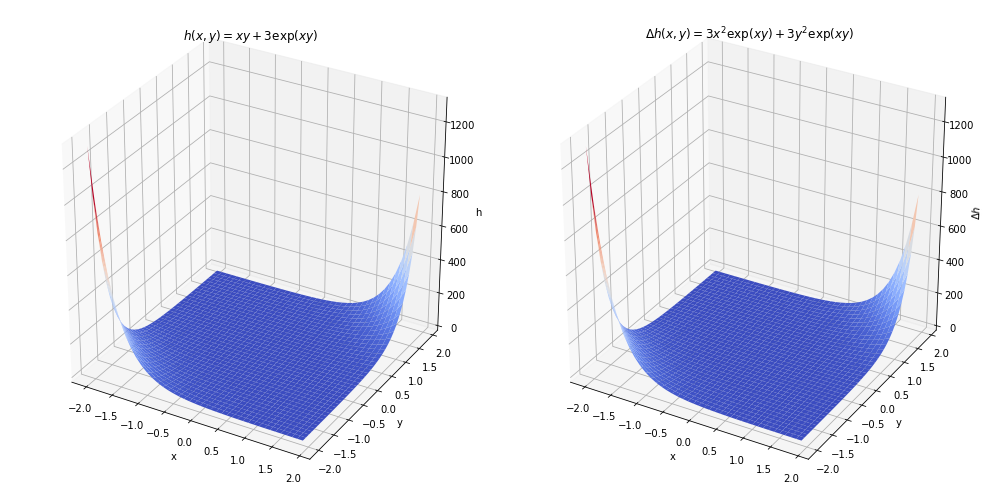

In [17]:
x = numpy.arange(-2, 2, 0.1)
y = numpy.arange(-2, 2, 0.1)
X, Y = numpy.meshgrid(x, y)

h = X * Y + 3 * numpy.exp(X*Y)

# Laplacian
h = 3*X**2*numpy.exp(X*Y) + 3*Y**2*numpy.exp(X*Y)

ax = [0, 0]
fig = plt.figure(figsize=(14, 7))
ax[0] = fig.add_subplot(121, projection='3d')
ax[1] = fig.add_subplot(122, projection='3d')

ax[0].plot_surface(X, Y, h, cmap='coolwarm', lw=0.25)
ax[1].plot_surface(X, Y, h, cmap='coolwarm', lw=0.25)

for i in range(2):
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    
ax[0].set_zlabel("h")
ax[0].set_title(r'$h(x,y)=xy+3\exp(xy)$')
ax[1].set_zlabel(r"$\Delta h$")
ax[1].set_title(r'$\Delta h(x,y)=3x^2\exp(xy)+3y^2\exp(xy)$')

fig.tight_layout()
plt.show()